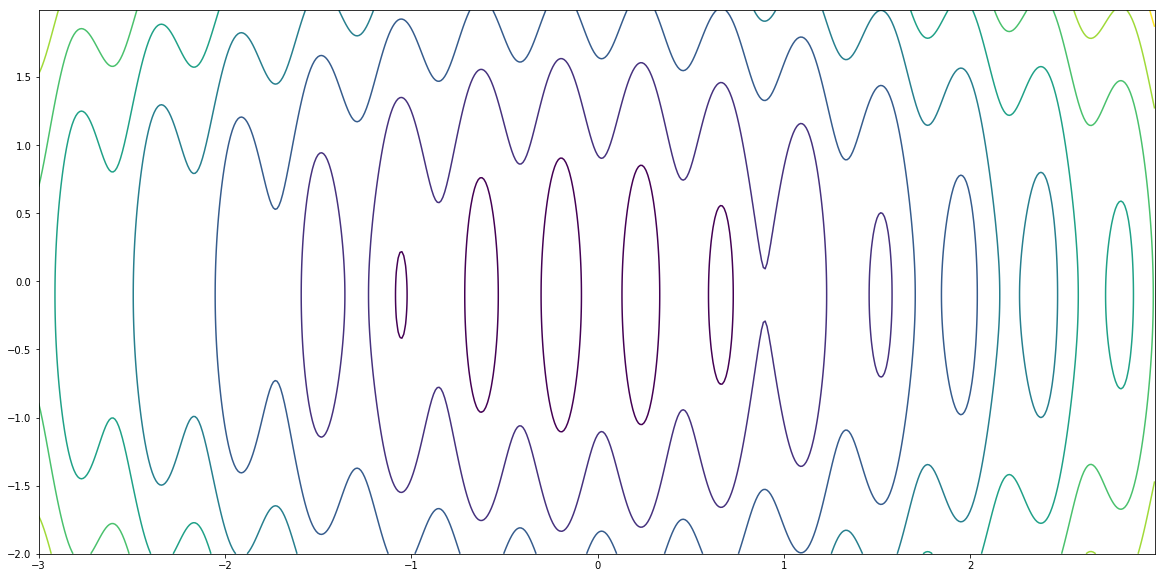

In [1]:
from math import *
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

def func2d(x):
    f = cos(14.5 * x[0] - 0.3) + (x[1] + 0.2) * x[1] + (x[0] + 0.2) * x[0]
    df = np.zeros(2)
    df[0] = -14.5 * sin(14.5 * x[0] - 0.3) + 2. * x[0] + 0.2
    df[1] = 2. * x[1] + 0.2
    return f, df

delta = 0.01
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
dim = X.shape

X_ = X.reshape(dim[0]*dim[1],1)
Y_ = Y.reshape(dim[0]*dim[1],1)



Z_ = []
for i in range(len(X_)):
    v = [X_[i],Y_[i]]
    y,dy = func2d(v)
    Z_.append(y)

Z = np.array(Z_).reshape(dim)
plt.figure(figsize=(20,10)) 
CS = plt.contour(X, Y, Z)



In [5]:
from scipy.optimize import basinhopping
minimizer_kwargs = {"method":"L-BFGS-B", "jac":True}
x0 = [1.0, 1.0]
ret = basinhopping(func2d, x0, minimizer_kwargs=minimizer_kwargs, niter=200)

print("global minimum: x = [%.4f, %.4f], f(x0) = %.4f" % (ret.x[0], ret.x[1], ret.fun))


global minimum: x = [-0.1951, -0.1000], f(x0) = -1.0109
